In [107]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import collections
from river import datasets

In [109]:
dataset = datasets.Phishing()
dataset

Phishing websites.

This dataset contains features from web pages that are classified as phishing or not.

    Name  Phishing                                                                                                                                              
    Task  Binary classification                                                                                                                                 
 Samples  1,250                                                                                                                                                 
Features  9                                                                                                                                                     
  Sparse  False                                                                                                                                                 
    Path  /home/denys_herasymuk/UCU/Studying_abroad/NYU_Internship/Code/RAI-summer-stabi

Let's take a look at the first sample.

In [110]:
x, y = next(iter(dataset))
x

{'empty_server_form_handler': 0.0,
 'popup_window': 0.0,
 'https': 0.0,
 'request_from_other_domain': 0.0,
 'anchor_from_other_domain': 0.0,
 'is_popular': 0.5,
 'long_url': 1.0,
 'age_of_domain': 1,
 'ip_in_url': 1}

In [111]:
y

True

In [112]:
counts = collections.Counter(y for _, y in dataset)
dataset_size = 0
for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')
    dataset_size += count

print('Dataset size: ', dataset_size)

True: 548 (43.84000%)
False: 702 (56.16000%)
Dataset size:  1250


In [113]:
def get_base_model():
    return tree.HoeffdingTreeClassifier(grace_period=50, delta=0.01)

In [114]:
from river import tree
from source.stability_analyzer import StabilityAnalyzer

base_model = get_base_model()
measure_every = 200

In [115]:
from river import metrics


label_mapping = {
    False: 0,
    True: 1,
}

# Conduct model pre-training
train_fraction = 0.3
train_size = int(dataset_size * train_fraction)
acc_metric = metrics.Accuracy()
f1_metric = metrics.WeightedF1()
for idx, (x, y_true) in enumerate(dataset):
    y_true = label_mapping[y_true]
    y_pred = base_model.predict_one(x)

    # Update the error metric
    if y_pred is not None:
        acc_metric = acc_metric.update(y_true, y_pred)
        f1_metric = f1_metric.update(y_true, y_pred)

    base_model.learn_one(x=x, y=y_true)
    if idx + 1 == train_size:
        break

print(acc_metric)
print(f1_metric)

Accuracy: 84.76%
WeightedF1: 84.80%


In [116]:
dataset_limit = None
stability_analyzer = StabilityAnalyzer(base_model, batch_size=measure_every)

# TODO: conduct model validation

# Test the model
for idx, (x, y_true) in enumerate(dataset):
    y_true = label_mapping[y_true]
    stability_analyzer.measure_stability_metrics(x, y_true)

    # Shrink the dataset if needed
    if dataset_limit is not None and (idx + 1) == dataset_limit:
        break

Sample number: 200
Accuracy: 0.864321608040201
Mean: 0.41708542713567837
Std: 0.0
IQR: 0.0
Per sample accuracy: 0.864321608040201
Label stability: 1.0
Jitter: 0.0


Sample number: 400
Accuracy: 0.8894472361809045
Mean: 0.4046733668341709
Std: 0.10827994279634746
IQR: 0.04271356783919598
Per sample accuracy: 0.8675879396984925
Label stability: 0.9116582914572865
Jitter: 0.0709984264758136


Sample number: 600
Accuracy: 0.9095477386934674
Mean: 0.3735678391959799
Std: 0.13251392367042916
IQR: 0.07160804020100503
Per sample accuracy: 0.8869346733668342
Label stability: 0.8804020100502512
Jitter: 0.09131110095934246


Sample number: 800
Accuracy: 0.9296482412060302
Mean: 0.4438190954773869
Std: 0.11353099607930706
IQR: 0.059045226130653265
Per sample accuracy: 0.8990954773869347
Label stability: 0.8992964824120604
Jitter: 0.0779330998426479


Sample number: 1000
Accuracy: 0.9246231155778895
Mean: 0.45618090452261306
Std: 0.10903570855088936
IQR: 0.08542713567839195
Per sample accuracy: 0.9

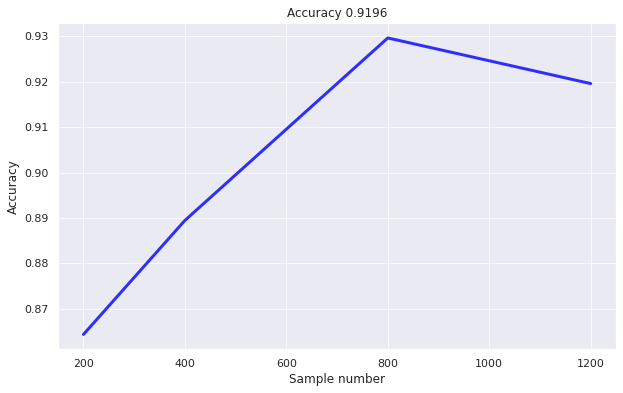

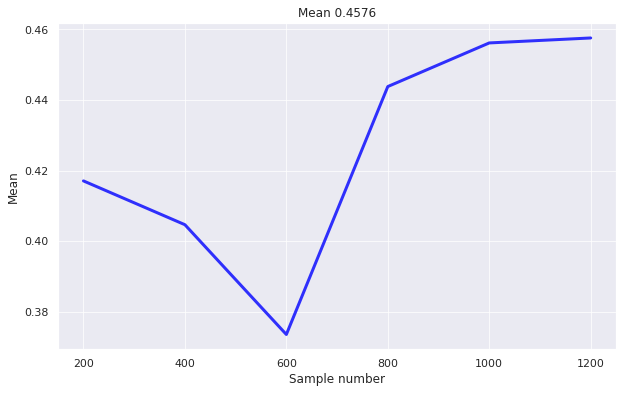

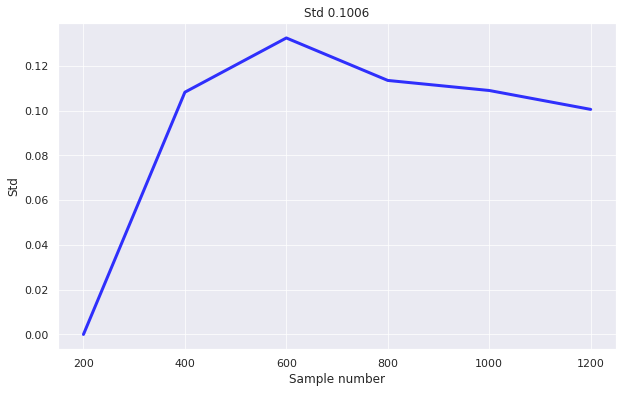

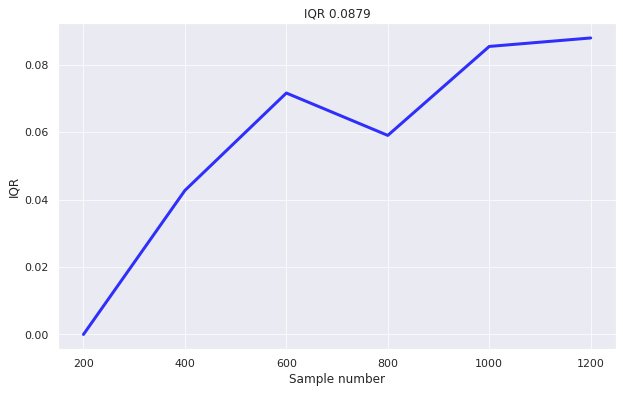

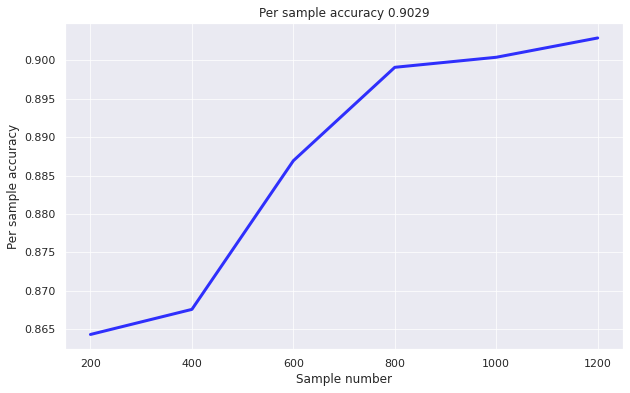

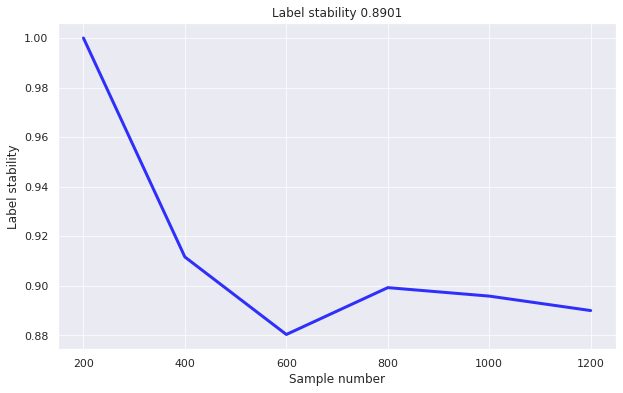

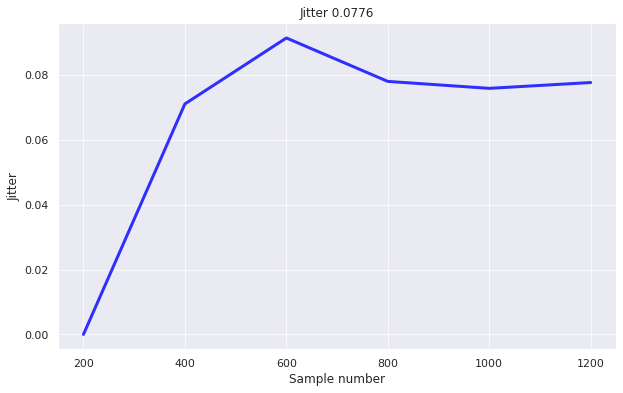

In [118]:
stability_analyzer.plot_metrics_history()

## Predict with HoeffdingTreeClassifier

In [16]:
from river import compose
from river import preprocessing

from source.utils.river_utils import evaluate_binary_model

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    get_base_model()
)

model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  HoeffdingTreeClassifier (
    grace_period=50
    max_depth=inf
    split_criterion="info_gain"
    delta=0.01
    tau=0.05
    leaf_prediction="nba"
    nb_threshold=0
    nominal_attributes=None
    splitter=GaussianSplitter (
      n_splits=10
    )
    binary_split=False
    max_size=100.
    memory_estimate_period=1000000
    stop_mem_management=False
    remove_poor_attrs=False
    merit_preprune=True
  )
)

Index: 50; Accuracy: 81.63%; CohenKappa: 63.94%; WeightedF1: 81.53%
Index: 100; Accuracy: 83.84%; CohenKappa: 67.77%; WeightedF1: 83.81%
Index: 150; Accuracy: 83.22%; CohenKappa: 66.42%; WeightedF1: 83.18%
Index: 200; Accuracy: 83.42%; CohenKappa: 66.86%; WeightedF1: 83.43%
Index: 250; Accuracy: 82.73%; CohenKappa: 65.32%; WeightedF1: 82.74%
Index: 300; Accuracy: 83.61%; CohenKappa: 66.95%; WeightedF1: 83.65%
Index: 350; Accuracy: 85.10%; CohenKappa: 69.66%; WeightedF1: 85.14%
Index: 400; Accuracy: 84.21%; CohenKappa: 67.42%; WeightedF1: 84.19%
Index: 450; Accuracy: 85.08%; CohenKappa: 68.79%; WeightedF1: 85.04%
Index: 500; Accuracy: 84.97%; CohenKappa: 68.85%; WeightedF1: 84.91%
Index: 550; Accuracy: 85.06%; CohenKappa: 68.92%; WeightedF1: 85.00%
Index: 600; Accuracy: 85.48%; CohenKappa: 69.53%; WeightedF1: 85.40%
Index: 650; Accuracy: 85.98%; CohenKappa: 70.56%; WeightedF1: 85.92%
Index: 700; Accuracy: 86.27%; CohenKappa: 71.30%; WeightedF1: 86.22%
Index: 750; Accuracy: 86.25%; Cohen

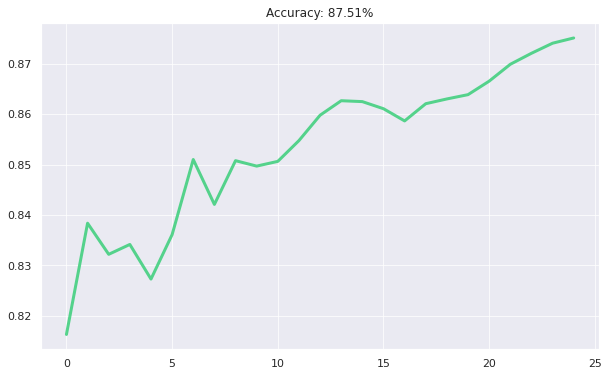

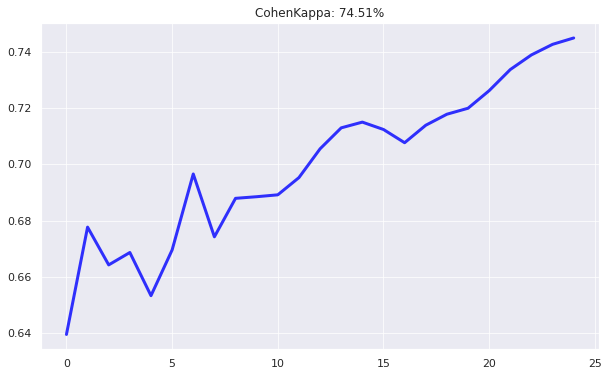

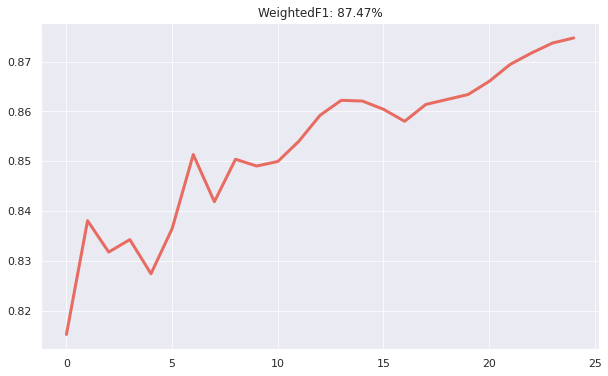

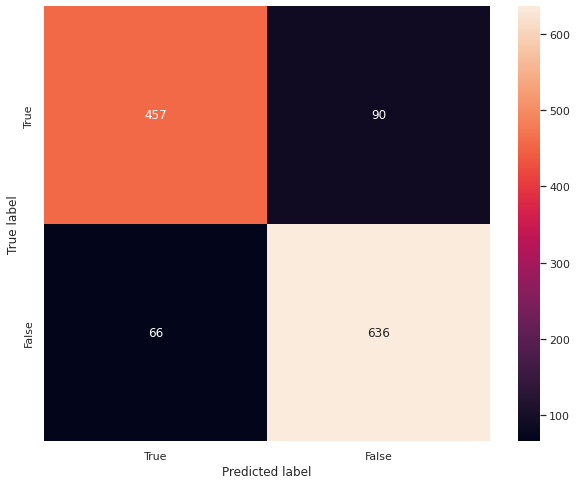

In [17]:
evaluate_binary_model(dataset, model, measure_every=50)